## Collaborative Filtering

In [14]:
# import pandas
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

We will create an recommender engine based on Item Based Collaborative Filtering (IBCF) which searches for the most similar books based on the user ratings. We can download the data from [here](https://drive.google.com/file/d/1WvTmAfO09TCX7xp7uu06__ziic7JnrL5/view?usp=sharing).

In [3]:
book_ratings = pd.read_csv('E:\Vocational\Lighthouse Labs\Flex Course\C08_Machine Learning Application\exercise_recommender_engines\data\\bx_book_ratings.csv',sep=";", encoding="latin")

In [5]:
books = pd.read_csv('E:\Vocational\Lighthouse Labs\Flex Course\C08_Machine Learning Application\exercise_recommender_engines\data\\bx_books.csv',sep=";", encoding="latin", on_bad_lines='skip', low_memory=False)

* Explore both datasets

In [18]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
book_ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [9]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
book_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
book_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [13]:
book_ratings.duplicated().sum()

0

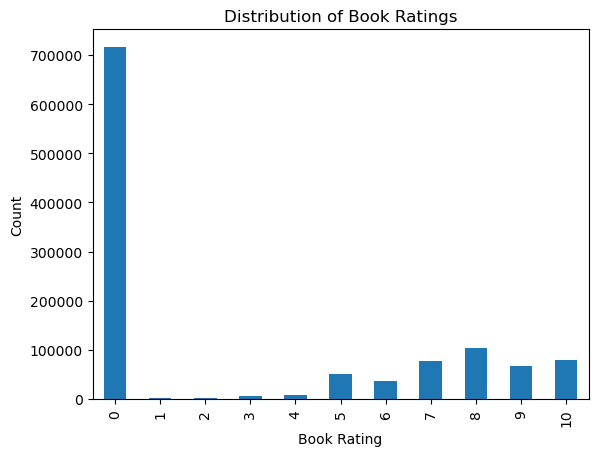

In [15]:
book_ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

In [19]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [20]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [25]:
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [22]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [23]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [24]:
book_ratings.duplicated().sum()

0

In [26]:
books['Book-Title'].nunique()

242135

In [27]:
books['Book-Author'].nunique()

102023

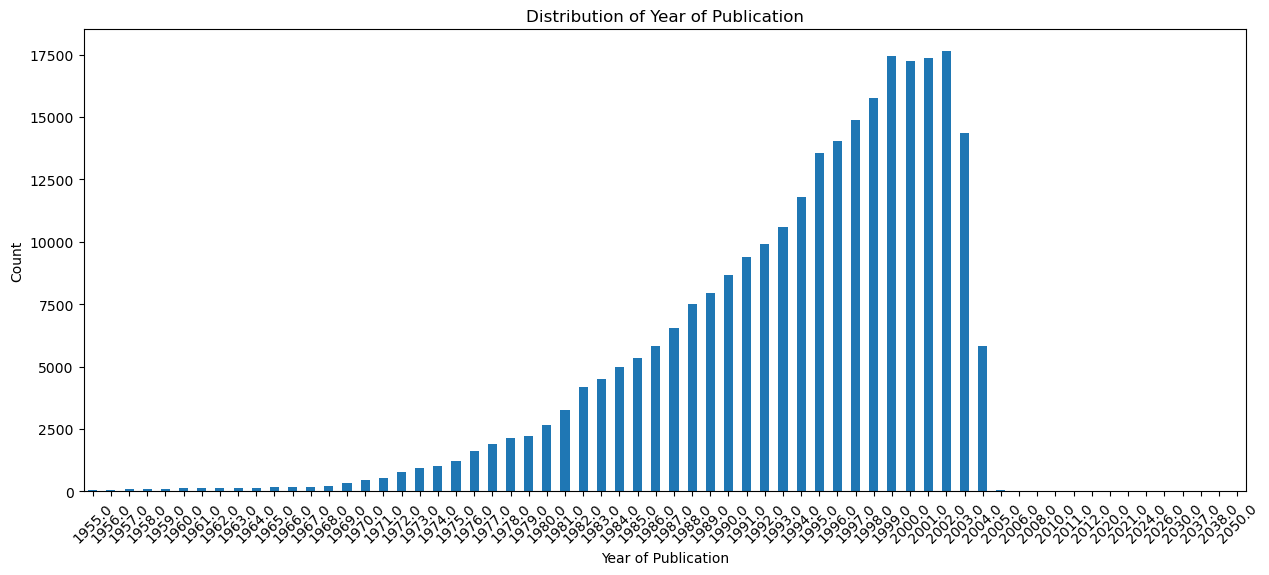

In [34]:
# Convert the 'Year-Of-Publication' column to numeric, setting errors='coerce' to handle invalid parsing
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Filter out rows where 'Year-Of-Publication' is NaN or 0
filtered_books = books[(books['Year-Of-Publication'].notna()) & (books['Year-Of-Publication'] != 0)]

# Further filter to only include years from 1900 onwards
filtered_books = filtered_books[filtered_books['Year-Of-Publication'] >= 1955]

# Plot the distribution of the filtered 'Year-Of-Publication'
plt.figure(figsize=(15, 6))
filtered_books['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.title('Distribution of Year of Publication')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* create dataframe with name 'df_book_features' from book_ratings that have `ISBN` as index, `User-ID` as columns and values are `Book-Rating`.
    - The data are quite big so it's OK to use a sample only in case your PC has limited RAM.


In [47]:
# Sample and preprocess the data
sample_size = 10000  # Adjust this size based on your memory capacity
book_ratings_sample = book_ratings.sample(n=sample_size, random_state=42)

In [48]:
# Remove any potential duplicates in the sampled data
book_ratings_sample = book_ratings_sample.drop_duplicates()

In [49]:
# Create the pivot table
df_book_features = book_ratings_sample.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)

In [50]:
df_book_features.head()

User-ID,183,243,254,382,503,507,566,626,643,651,...,278469,278490,278536,278545,278582,278621,278675,278781,278846,278852
ISBN,,,,,,,,,,,,,,,,,,,,,
904492401X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000001949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000001481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002156601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* create the instance of the NearestNeighbors class

In [51]:
nn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

* fit the NearestNeighbors using'df_book_features'

In [52]:
# Fit the model
nn.fit(df_book_features)

NearestNeighbors(metric='cosine')

* create function that returns top 5 most similar books (according to KNN model) for selected ISBN
    * the input will be Book-Title from the DataFrame books 
    * the output will be the Book-Titles of the top 5 most similar books.
    * for every book in the top 5 most similar books, print also the distance from the selected book (ISBN we chose as input to the function)

In [53]:
# Define the function to get top 5 most similar books
def get_top_5_similar_books(book_title, books_df, nn_model, features_df):
    # Find the ISBN for the given book title
    selected_isbn = books_df[books_df['Book-Title'] == book_title]['ISBN'].values[0]
    
    # Check if the selected ISBN is in the features DataFrame
    if selected_isbn not in features_df.index:
        return "The selected book is not available in the ratings data."
    
    # Find the index of the selected book in the features dataframe
    selected_book_index = features_df.index.get_loc(selected_isbn)
    
    # Find the nearest neighbors
    distances, indices = nn_model.kneighbors([features_df.iloc[selected_book_index].values])
    
    # Create a list to store the results
    similar_books = []
    
    for i in range(1, len(indices[0])):  # Start from 1 to skip the first one which is the book itself
        similar_isbn = features_df.index[indices[0][i]]
        similar_book_title = books_df[books_df['ISBN'] == similar_isbn]['Book-Title'].values[0]
        distance = distances[0][i]
        similar_books.append((similar_book_title, distance))
    
    return similar_books

* Apply the function to book of your choice

In [54]:
# Example usage
book_title_input = "The Catcher in the Rye"  # Replace with the title of the book you're interested in
top_5_similar_books = get_top_5_similar_books(book_title_input, books, nn, df_book_features)

In [55]:
# Print the results
if isinstance(top_5_similar_books, str):
    print(top_5_similar_books)
else:
    for title, distance in top_5_similar_books:
        print(f"Title: {title}, Distance: {distance}")

Title: HEAVEN, Distance: 1.0
Title: HABIBI, Distance: 1.0
Title: The Watcher, Distance: 1.0
Title: The View from Saturday (Jean Karl Books (Paperback)), Distance: 1.0
